<a href="https://colab.research.google.com/github/Brianbrowncoopman/challenge_desafio_telecom_x/blob/master/desafio_telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***EXTRACCION***


In [ ]:

import pandas as pd
import ast
from pandas import json_normalize
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_datos_originales = pd.read_json('/content/TelecomX_Data.json' )

### ***Transformacion***

In [ ]:
df_datos_originales.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df_datos_originales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
print(df_datos_originales.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [ ]:
pd.json_normalize(df_datos_originales['customerID'])
df_datos_originales.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = df_datos_originales.copy()

In [ ]:
columnas = list(df_datos_originales.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [ ]:
columnas_a_expandir = ['customer', 'phone', 'internet', 'account','account_Charges']

In [ ]:

for col in columnas_a_expandir:
    # Solo convierte si es string (para evitar error)
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Expandir en nuevas columnas
    columnas_expandidas = df[col].apply(pd.Series)

    # Agregar prefijo para identificar el origen
    columnas_expandidas.columns = [f"{col}_{subcol}" for subcol in columnas_expandidas.columns]

    # Combinar al DataFrame y eliminar la original
    df = pd.concat([df.drop(columns=[col]), columnas_expandidas], axis=1)

# Vista previa
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [ ]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
1513,2178-PMGCJ,No,Male,0,No,No,22,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.70,1490.4
5784,7905-NJMXS,No,Male,1,Yes,No,7,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,64.20,475
3869,5297-MDOIR,No,Female,0,Yes,No,63,Yes,No,Fiber optic,...,No,Yes,No,No,No,One year,Yes,Credit card (automatic),81.15,5224.5
6580,9053-EJUNL,No,Male,0,No,No,41,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75
2269,3165-HDOEW,Yes,Male,0,Yes,Yes,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,45.85
1613,2284-VFLKH,No,Male,0,Yes,No,49,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),99.25,4920.8
3524,4854-SSLTN,No,Male,0,Yes,Yes,2,Yes,No,DSL,...,Yes,No,Yes,No,No,Two year,No,Mailed check,59.50,130.5
5786,7908-QCBCA,Yes,Female,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.40,69.4
5204,7105-MXJLL,No,Female,1,Yes,No,26,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,60.70,1597.4
5880,8040-MNRTF,No,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,71.10,71.1


In [ ]:
col_numericas = ['account_Charges_Total', 'account_Charges_Monthly']

In [ ]:
df['account_Charges_Total'].apply(lambda x: str(x).strip() == '').sum()

np.int64(11)

In [ ]:
df['account_Charges_Total'] = df['account_Charges_Total'].apply(
    lambda x: 0 if str(x).strip() == '' else x
)

In [ ]:
df['account_Charges_Total'].apply(lambda x: str(x).strip() == '').sum()

np.int64(0)

In [ ]:
df[col_numericas] = df[col_numericas].astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
columnas_clave = [
    'Churn',
    'customer_tenure',
    'account_Contract',
    'internet_InternetService',
    'internet_TechSupport',
    'account_Charges_Monthly',
    'account_PaymentMethod',
    'account_PaperlessBilling',
    'customer_SeniorCitizen'
]

In [ ]:
df_churn = df[columnas_clave].copy()

In [ ]:
df_churn = df_churn.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)

<ipython-input-21-bfa1913d8d06>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_churn = df_churn.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)


In [ ]:
print(df_churn.isnull().sum())

Churn                       224
customer_tenure               0
account_Contract              0
internet_InternetService      0
internet_TechSupport          0
account_Charges_Monthly       0
account_PaymentMethod         0
account_PaperlessBilling      0
customer_SeniorCitizen        0
dtype: int64


In [ ]:
df_churn = df_churn.dropna()

In [ ]:
df_churn['customer_tenure'] = pd.to_numeric(df_churn['customer_tenure'], errors='coerce')
df_churn['account_Charges_Monthly'] = pd.to_numeric(df_churn['account_Charges_Monthly'], errors='coerce')
df_churn['customer_SeniorCitizen'] = df_churn['customer_SeniorCitizen'].astype(int)

In [ ]:
df_churn.info()
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer_tenure           7043 non-null   int64  
 2   account_Contract          7043 non-null   object 
 3   internet_InternetService  7043 non-null   object 
 4   internet_TechSupport      7043 non-null   object 
 5   account_Charges_Monthly   7043 non-null   float64
 6   account_PaymentMethod     7043 non-null   object 
 7   account_PaperlessBilling  7043 non-null   object 
 8   customer_SeniorCitizen    7043 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 550.2+ KB


,Churn,customer_tenure,account_Contract,internet_InternetService,internet_TechSupport,account_Charges_Monthly,account_PaymentMethod,account_PaperlessBilling,customer_SeniorCitizen
0,No,9,One year,DSL,Yes,65.6,Mailed check,Yes,0
1,No,9,Month-to-month,DSL,No,59.9,Mailed check,No,0
2,Yes,4,Month-to-month,Fiber optic,No,73.9,Electronic check,Yes,0
3,Yes,13,Month-to-month,Fiber optic,No,98.0,Electronic check,Yes,1
4,Yes,3,Month-to-month,Fiber optic,Yes,83.9,Mailed check,Yes,1


In [ ]:
df_churn.to_csv('df_churn_limpio.csv', index=False)

In [ ]:
df_churn['Cuentas_Diarias'] = df_churn['account_Charges_Monthly'] / 30

In [ ]:
df_churn[['account_Charges_Monthly', 'Cuentas_Diarias']].head()

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
df_churn_limpio = df_churn.copy()
df_churn_limpio.to_csv('df_churn_limpio_1.csv', index=False)
df_churn_limpio.head(2)

,Churn,customer_tenure,account_Contract,internet_InternetService,internet_TechSupport,account_Charges_Monthly,account_PaymentMethod,account_PaperlessBilling,customer_SeniorCitizen,Cuentas_Diarias
0,No,9,One year,DSL,Yes,65.6,Mailed check,Yes,0,2.186667
1,No,9,Month-to-month,DSL,No,59.9,Mailed check,No,0,1.996667


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer_tenure           7043 non-null   int64  
 2   account_Contract          7043 non-null   object 
 3   internet_InternetService  7043 non-null   object 
 4   internet_TechSupport      7043 non-null   object 
 5   account_Charges_Monthly   7043 non-null   float64
 6   account_PaymentMethod     7043 non-null   object 
 7   account_PaperlessBilling  7043 non-null   object 
 8   customer_SeniorCitizen    7043 non-null   int64  
 9   Cuentas_Diarias           7043 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 605.3+ KB


In [ ]:
nombre_columnas = {

    'customer_tenure': 'Antigüedad_del_Cliente',
    'account_Contract': 'Contrato_de_la_Cuenta',
    'internet_InternetService': 'Servicio_de_Internet',
    'internet_TechSupport': 'Soporte_Técnico_de_Internet',
    'account_Charges_Monthly': 'Cargos_Mensuales_de_la_Cuenta',
    'account_PaymentMethod': 'Método_de_Pago_de_la_Cuenta',
    'account_PaperlessBilling': 'Facturación_Sin_Papel_de_la_Cuenta',
    'customer_SeniorCitizen': 'Cliente_Adulto_Mayor'
}

In [ ]:
df_churn = df_churn.rename(columns=nombre_columnas)

In [ ]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


In [ ]:
df_churn.tail(20
              )



,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
7246,Yes,9,Month-to-month,Fiber optic,No,83.85,Electronic check,Yes,1,2.795000
7248,No,19,Month-to-month,No,No internet service,19.90,Mailed check,No,0,0.663333
7249,No,63,One year,DSL,Yes,68.80,Bank transfer (automatic),No,0,2.293333
7250,No,6,Month-to-month,No,No internet service,19.70,Credit card (automatic),No,0,0.656667
7251,No,34,Month-to-month,Fiber optic,Yes,108.90,Electronic check,Yes,1,3.630000
7252,No,67,Two year,No,No internet service,19.25,Bank transfer (automatic),Yes,0,0.641667
7253,No,28,Month-to-month,DSL,Yes,54.65,Bank transfer (automatic),No,0,1.821667
7254,No,53,One year,Fiber optic,Yes,94.00,Electronic check,Yes,1,3.133333
7255,No,64,Month-to-month,Fiber optic,Yes,99.15,Credit card (automatic),Yes,0,3.305000
7256,No,46,Two year,No,No internet service,19.75,Credit card (automatic),No,0,0.658333


In [ ]:
columnas_cambiar = [
    'Churn',
    'Soporte_Técnico_de_Internet',
    'Facturación_Sin_Papel_de_la_Cuenta'  #s
]

In [ ]:
df_churn[columnas_cambiar] = df_churn[columnas_cambiar].replace({'Yes': 1, 'No': 0})

<ipython-input-36-ebbc38d494c1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn[columnas_cambiar] = df_churn[columnas_cambiar].replace({'Yes': 1, 'No': 0})


In [ ]:
print(df_churn[columnas_cambiar].head())

   Churn Soporte_Técnico_de_Internet  Facturación_Sin_Papel_de_la_Cuenta
0      0                           1                                   1
1      0                           0                                   0
2      1                           0                                   1
3      1                           0                                   1
4      1                           1                                   1


In [ ]:
df_churn.tail(20)

,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
7246,1,9,Month-to-month,Fiber optic,0,83.85,Electronic check,1,1,2.795000
7248,0,19,Month-to-month,No,No internet service,19.90,Mailed check,0,0,0.663333
7249,0,63,One year,DSL,1,68.80,Bank transfer (automatic),0,0,2.293333
7250,0,6,Month-to-month,No,No internet service,19.70,Credit card (automatic),0,0,0.656667
7251,0,34,Month-to-month,Fiber optic,1,108.90,Electronic check,1,1,3.630000
7252,0,67,Two year,No,No internet service,19.25,Bank transfer (automatic),1,0,0.641667
7253,0,28,Month-to-month,DSL,1,54.65,Bank transfer (automatic),0,0,1.821667
7254,0,53,One year,Fiber optic,1,94.00,Electronic check,1,1,3.133333
7255,0,64,Month-to-month,Fiber optic,1,99.15,Credit card (automatic),1,0,3.305000
7256,0,46,Two year,No,No internet service,19.75,Credit card (automatic),0,0,0.658333


In [ ]:
df_churn['Soporte_Técnico_de_Internet'] = (df_churn['Soporte_Técnico_de_Internet'].replace({'Yes': 1,'No': 0,'No internet service': 0}).fillna(0).astype(int))                  # Asegurar que sea entero


<ipython-input-39-c32e4f53c3ae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['Soporte_Técnico_de_Internet'] = (df_churn['Soporte_Técnico_de_Internet'].replace({'Yes': 1,'No': 0,'No internet service': 0}).fillna(0).astype(int))                  # Asegurar que sea entero


In [ ]:
print(df_churn['Servicio_de_Internet'].value_counts(dropna=False))


Servicio_de_Internet
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [ ]:
print(df_churn['Método_de_Pago_de_la_Cuenta'].value_counts(dropna=False))

Método_de_Pago_de_la_Cuenta
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [ ]:
print(df_churn['Contrato_de_la_Cuenta'].value_counts(dropna=False))

Contrato_de_la_Cuenta
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [ ]:
df_churn

,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
0,0,9,One year,DSL,1,65.60,Mailed check,1,0,2.186667
1,0,9,Month-to-month,DSL,0,59.90,Mailed check,0,0,1.996667
2,1,4,Month-to-month,Fiber optic,0,73.90,Electronic check,1,0,2.463333
3,1,13,Month-to-month,Fiber optic,0,98.00,Electronic check,1,1,3.266667
4,1,3,Month-to-month,Fiber optic,1,83.90,Mailed check,1,1,2.796667
...,...,...,...,...,...,...,...,...,...,...
7262,0,13,One year,DSL,1,55.15,Mailed check,0,0,1.838333
7263,1,22,Month-to-month,Fiber optic,0,85.10,Electronic check,1,0,2.836667
7264,0,2,Month-to-month,DSL,0,50.30,Mailed check,1,0,1.676667
7265,0,67,Two year,DSL,1,67.85,Mailed check,0,0,2.261667


### ***Carga y analisis***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_churn.head()

,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
0,0,9,One year,DSL,1,65.6,Mailed check,1,0,2.186667
1,0,9,Month-to-month,DSL,0,59.9,Mailed check,0,0,1.996667
2,1,4,Month-to-month,Fiber optic,0,73.9,Electronic check,1,0,2.463333
3,1,13,Month-to-month,Fiber optic,0,98.0,Electronic check,1,1,3.266667
4,1,3,Month-to-month,Fiber optic,1,83.9,Mailed check,1,1,2.796667


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Churn                               7043 non-null   int64  
 1   Antigüedad_del_Cliente              7043 non-null   int64  
 2   Contrato_de_la_Cuenta               7043 non-null   object 
 3   Servicio_de_Internet                7043 non-null   object 
 4   Soporte_Técnico_de_Internet         7043 non-null   int64  
 5   Cargos_Mensuales_de_la_Cuenta       7043 non-null   float64
 6   Método_de_Pago_de_la_Cuenta         7043 non-null   object 
 7   Facturación_Sin_Papel_de_la_Cuenta  7043 non-null   int64  
 8   Cliente_Adulto_Mayor                7043 non-null   int64  
 9   Cuentas_Diarias                     7043 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 605.3+ KB


In [ ]:
df_churn.describe()

,Churn,Antigüedad_del_Cliente,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,0.290217,64.761692,0.592219,0.162147,2.158723
std,0.441561,24.559481,0.453895,30.090047,0.491457,0.368612,1.003002
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.608333
25%,0.000000,9.000000,0.000000,35.500000,0.000000,0.000000,1.183333
50%,0.000000,29.000000,0.000000,70.350000,1.000000,0.000000,2.345000
75%,1.000000,55.000000,1.000000,89.850000,1.000000,0.000000,2.995000
max,1.000000,72.000000,1.000000,118.750000,1.000000,1.000000,3.958333


In [ ]:
df_churn

,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias
0,0,9,One year,DSL,1,65.60,Mailed check,1,0,2.186667
1,0,9,Month-to-month,DSL,0,59.90,Mailed check,0,0,1.996667
2,1,4,Month-to-month,Fiber optic,0,73.90,Electronic check,1,0,2.463333
3,1,13,Month-to-month,Fiber optic,0,98.00,Electronic check,1,1,3.266667
4,1,3,Month-to-month,Fiber optic,1,83.90,Mailed check,1,1,2.796667
...,...,...,...,...,...,...,...,...,...,...
7262,0,13,One year,DSL,1,55.15,Mailed check,0,0,1.838333
7263,1,22,Month-to-month,Fiber optic,0,85.10,Electronic check,1,0,2.836667
7264,0,2,Month-to-month,DSL,0,50.30,Mailed check,1,0,1.676667
7265,0,67,Two year,DSL,1,67.85,Mailed check,0,0,2.261667


### **open**

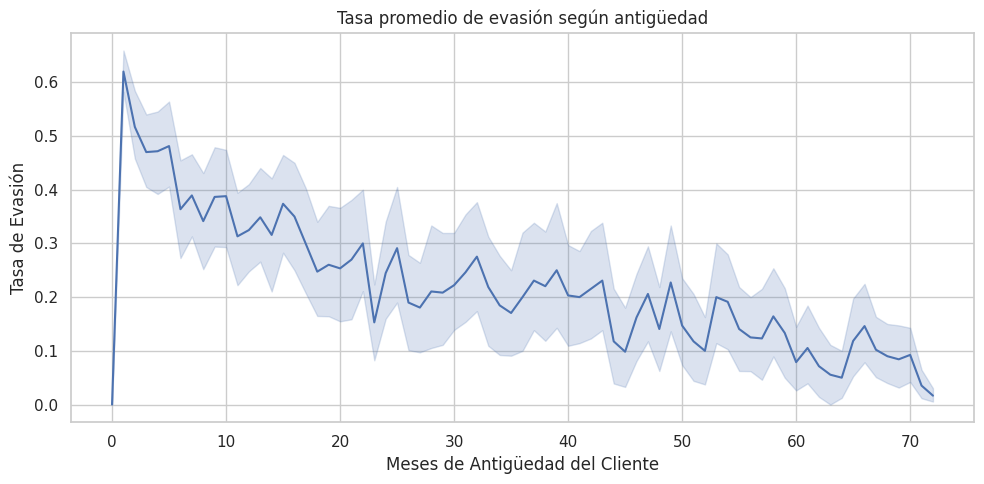

de este grafico se aprecia que mientras los clientes son mas nuevos , es mayor la tasa de evacion

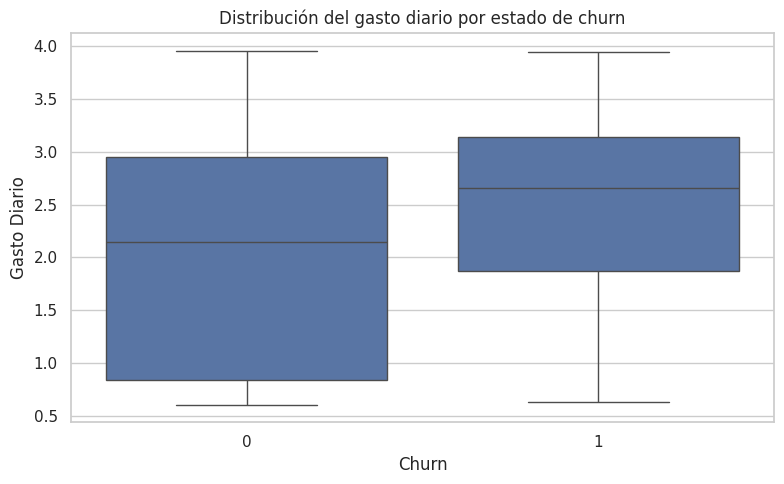

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_churn, x='Churn', y='Cuentas_Diarias')
plt.title('Distribución del gasto diario por estado de churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Diario')
plt.tight_layout()
plt.show()

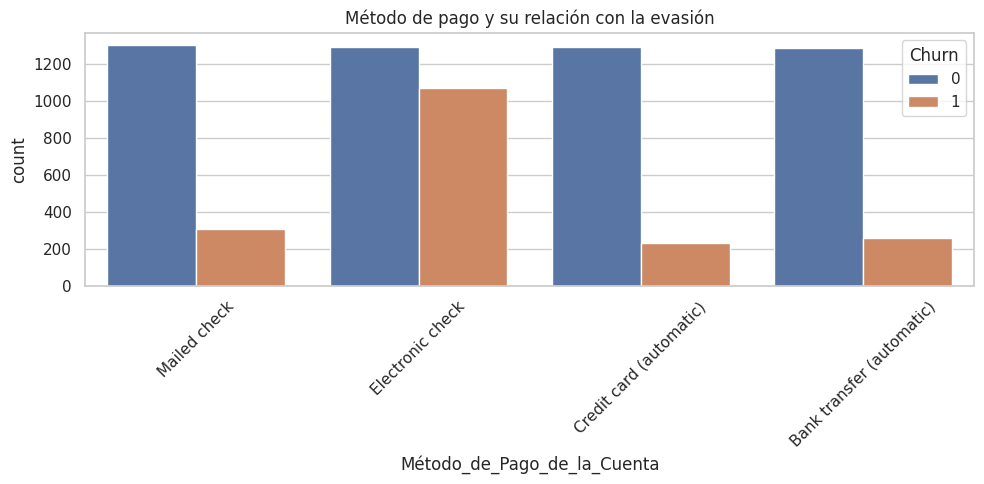

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_churn, x='Método_de_Pago_de_la_Cuenta', hue='Churn')
plt.title('Método de pago y su relación con la evasión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

los clientes con cuenta electronica son los mas propensos a salir y tambien los que tienen las cuentas mas altas

In [ ]:
df_churn['Churn'] = df_churn['Churn'].astype(int)

In [ ]:
corr_matrix = df_churn.corr(numeric_only=True)

In [ ]:
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

In [ ]:
print(churn_corr)

Cargos_Mensuales_de_la_Cuenta         0.193356
Cuentas_Diarias                       0.193356
Facturación_Sin_Papel_de_la_Cuenta    0.191825
Cliente_Adulto_Mayor                  0.150889
Soporte_Técnico_de_Internet          -0.164674
Antigüedad_del_Cliente               -0.352229
Name: Churn, dtype: float64


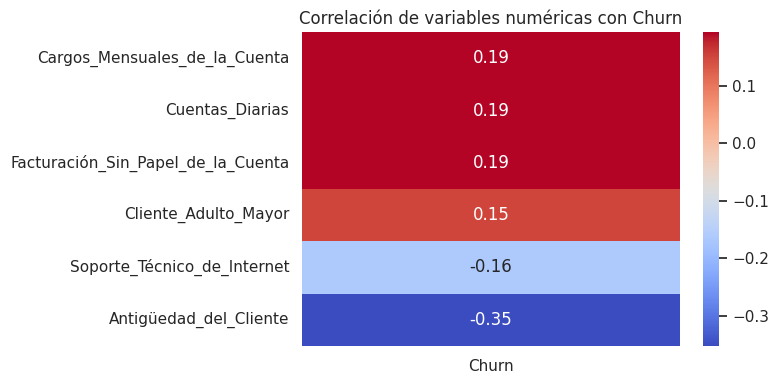

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables numéricas con Churn')
plt.tight_layout()
plt.show()

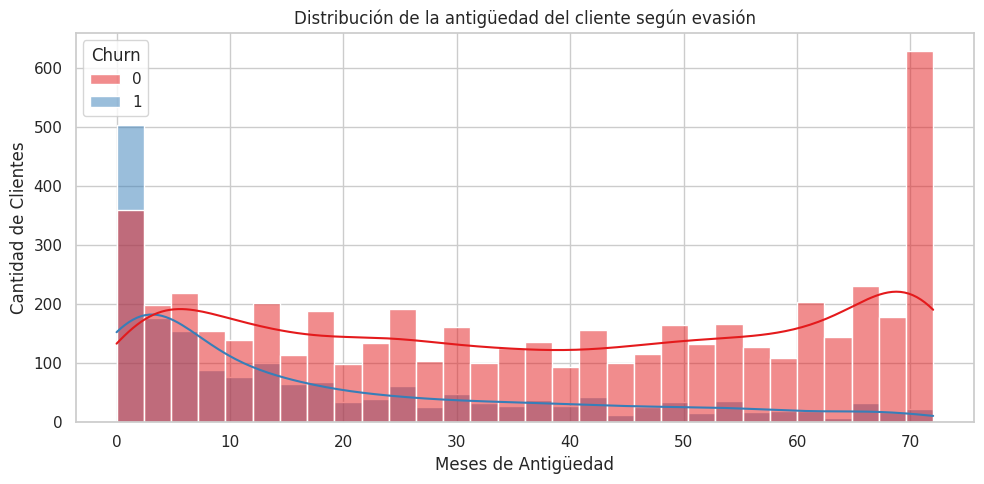

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_churn, x='Antigüedad_del_Cliente', hue='Churn', bins=30, kde=True, palette='Set1')
plt.title('Distribución de la antigüedad del cliente según evasión')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

se aprecia que la fuga principal ocurre en los primeros meses

In [ ]:
fig = px.histogram(
    df_churn,
    x='Antigüedad_del_Cliente',
    color='Churn',
    nbins=30,
    barmode='overlay',  # superpone las barras
    marginal='rug',  # agrega marcas individuales
    title='Distribución de la antigüedad del cliente según evasión',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='Meses de Antigüedad',
    yaxis_title='Cantidad de Clientes',
    bargap=0.1
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd


df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})


churn_tenure = df_churn.groupby('Antigüedad_del_Cliente')['Churn'].mean().reset_index()


fig = go.Figure()

# Línea 1: Antigüedad
fig.add_trace(go.Scatter(
    x=churn_tenure['Antigüedad_del_Cliente'],
    y=churn_tenure['Churn'],
    mode='lines+markers',
    name='Antigüedad del Cliente',
    line=dict(color='blue')
))


# Configuración del gráfico
fig.update_layout(
    title='Tasa de Evasión de Clientes según Factores Clave',
    xaxis_title='Categoría / Rango / Tiempo',
    yaxis_title='Tasa de Churn',
    hovermode='x unified',
    legend_title='Factores Analizados',
    template='plotly_white'
)

fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

# Asegurar que la variable 'Churn' sea numérica
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})

# Antigüedad
churn_tenure = df_churn.groupby('Antigüedad_del_Cliente')['Churn'].mean().reset_index()

# Cargos mensuales binned
df_churn['Cargos_bin'] = pd.cut(df_churn['Cargos_Mensuales_de_la_Cuenta'], bins=10)
churn_charges = df_churn.groupby('Cargos_bin')['Churn'].mean().reset_index()
churn_charges['Cargos_bin'] = churn_charges['Cargos_bin'].astype(str)

# Cliente Adulto Mayor
df_churn['Cliente_Adulto_Mayor'] = df_churn['Cliente_Adulto_Mayor'].replace({0: 'No', 1: 'Sí'})
churn_senior = df_churn.groupby('Cliente_Adulto_Mayor')['Churn'].mean().reset_index()

# Servicio de Internet
churn_internet = df_churn.groupby('Servicio_de_Internet')['Churn'].mean().reset_index()

# Crear subplots (2x2)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Churn por Antigüedad del Cliente",
        "Churn por Cargos Mensuales",
        "Churn por Cliente Adulto Mayor",
        "Churn por Servicio de Internet"
    ]
)

# Gráfico 1: Antigüedad
fig.add_trace(go.Scatter(
    x=churn_tenure['Antigüedad_del_Cliente'],
    y=churn_tenure['Churn'],
    mode='lines+markers',
    name='Antigüedad'
), row=1, col=1)

# Gráfico 2: Cargos Mensuales
fig.add_trace(go.Scatter(
    x=churn_charges['Cargos_bin'],
    y=churn_charges['Churn'],
    mode='lines+markers',
    name='Cargos Mensuales'
), row=1, col=2)

# Gráfico 3: Adulto Mayor
fig.add_trace(go.Scatter(
    x=churn_senior['Cliente_Adulto_Mayor'],
    y=churn_senior['Churn'],
    mode='lines+markers',
    name='Adulto Mayor'
), row=2, col=1)

# Gráfico 4: Servicio de Internet
fig.add_trace(go.Scatter(
    x=churn_internet['Servicio_de_Internet'],
    y=churn_internet['Churn'],
    mode='lines+markers',
    name='Servicio de Internet'
), row=2, col=2)

# Diseño final
fig.update_layout(
    height=800, width=1000,
    title_text="Análisis Interactivo de Evasión por Variables",
    showlegend=False,
    template='plotly_white'
)

fig.show()


<ipython-input-92-136481b68282>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
df_churn.head(2)

,Churn,Antigüedad_del_Cliente,Contrato_de_la_Cuenta,Servicio_de_Internet,Soporte_Técnico_de_Internet,Cargos_Mensuales_de_la_Cuenta,Método_de_Pago_de_la_Cuenta,Facturación_Sin_Papel_de_la_Cuenta,Cliente_Adulto_Mayor,Cuentas_Diarias,Cargos_Mensuales_bin,Cargos_bin
0,0,9,One year,DSL,1,65.6,Mailed check,1,No,2.186667,"(58.45, 68.5]","(58.45, 68.5]"
1,0,9,Month-to-month,DSL,0,59.9,Mailed check,0,No,1.996667,"(58.45, 68.5]","(58.45, 68.5]"


<ipython-input-97-3a3f68543729>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-3a3f68543729>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-3a3f68543729>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-3a3f68543729>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-3a3f68543729>:21: FutureWarning:

The default of observed=False is deprecated and will be changed 

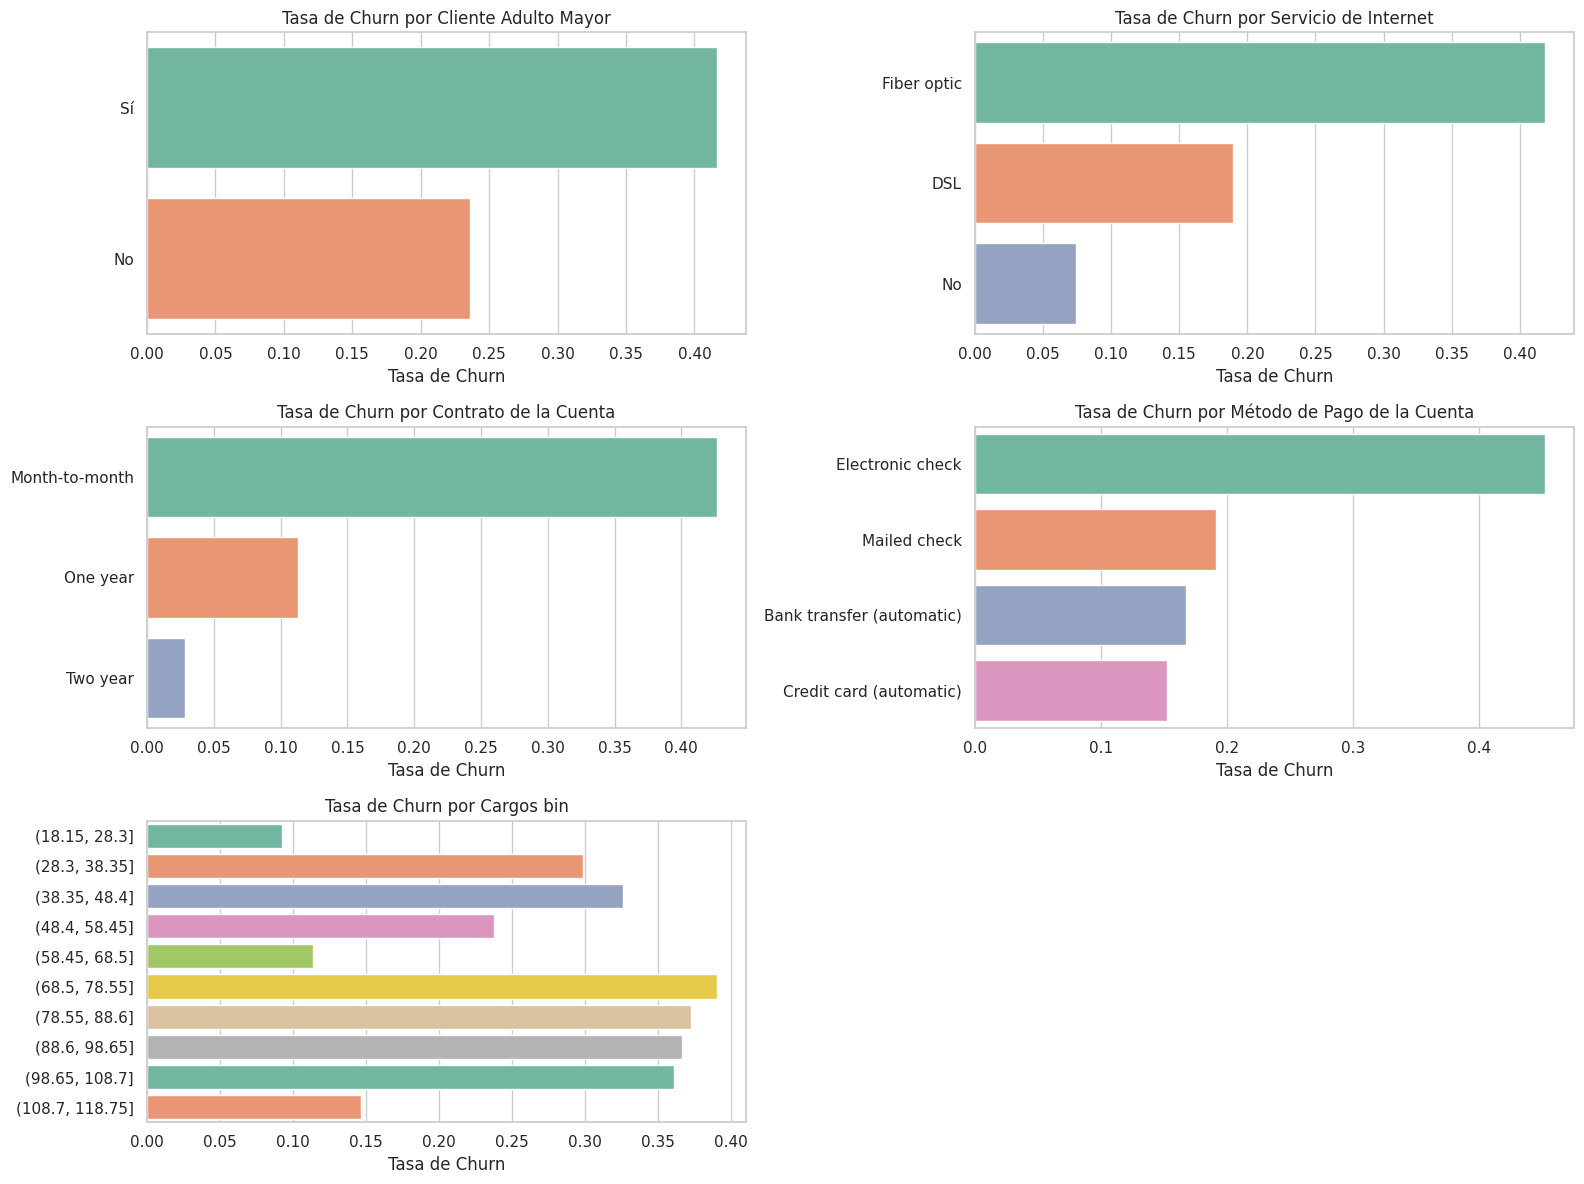

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que Churn sea numérico (1 para 'Yes', 0 para 'No')
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})

# Elegimos columnas categóricas
categoricas = [
    'Cliente_Adulto_Mayor',
    'Servicio_de_Internet',
    'Contrato_de_la_Cuenta',
    'Método_de_Pago_de_la_Cuenta',
    'Cargos_bin'
]

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    orden = df_churn.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(
        x=orden.values,
        y=orden.index,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"Tasa de Churn por {col.replace('_', ' ')}")
    axes[i].set_xlabel("Tasa de Churn")
    axes[i].set_ylabel("")

# Quitar el último gráfico vacío si hay 5 columnas
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


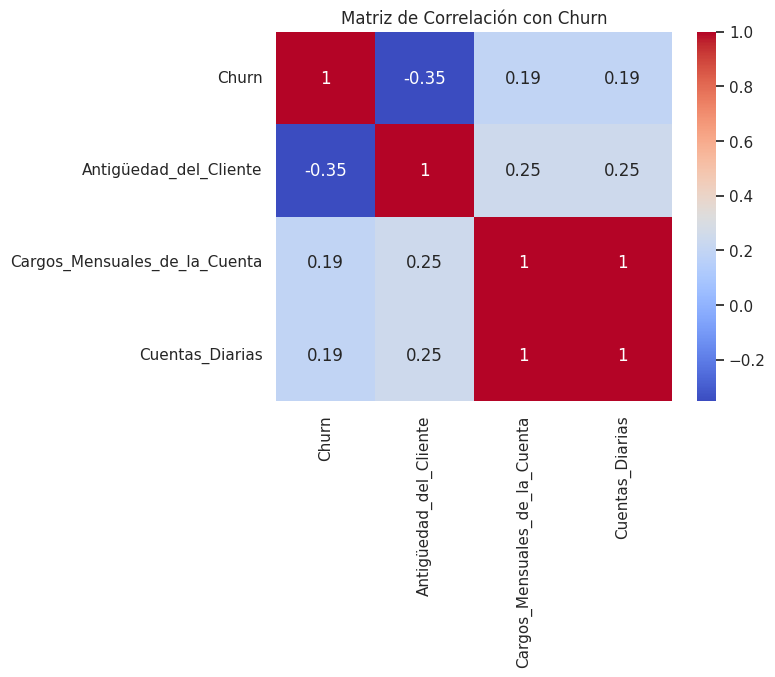

In [ ]:
import numpy as np

# Correlaciones numéricas
corr = df_churn[['Churn', 'Antigüedad_del_Cliente', 'Cargos_Mensuales_de_la_Cuenta', 'Cuentas_Diarias']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación con Churn")
plt.show()


### ***Informe final***

In [ ]:
Informe de Resultados

Tras el análisis y la visualización de los datos, se identificaron los siguientes hallazgos relevantes:
La tasa de pérdida de clientes recurrentes alcanza aproximadamente un 30%.
El género (hombre o mujer) no representa un factor determinante en la cancelación, ya que las tasas son muy similares.
El tipo de contrato influye de manera importante: los usuarios con planes mensuales presentan mayor propensión a cancelar, lo mismo ocurre con quienes pagan mediante cheque electrónico, modalidad que requiere gestión manual del pago.
En el gasto anual, se observa un mayor abandono hasta alrededor de los 3000 dólares, punto a partir del cual la tasa de cancelación se estabiliza.
En el gasto mensual, las cancelaciones aumentan de manera significativa una vez que los clientes alcanzan los 70 dólares mensuales.

Recomendaciones

Optimizar los contratos mensuales
Este esquema funciona muchas veces como un “periodo de prueba”.
Se recomienda ofrecer descuentos iniciales, beneficios adicionales o mejoras en el servicio que motiven a los usuarios a extender su permanencia.
Incentivar métodos de pago automáticos
Las formas de pago automatizadas presentan menores tasas de cancelación.
Se debería impulsar que todas las opciones digitales puedan configurarse como pagos automáticos, evitando que el cliente deba intervenir cada mes.
Revisar el servicio de fibra óptica
Los clientes con este plan muestran la mayor tasa de abandono.
Esto puede estar relacionado con la falta de cumplimiento en las velocidades prometidas o en la relación costo–beneficio.
Se sugiere realizar encuestas específicas para conocer las causas y, si es necesario, reforzar la infraestructura o la atención técnica.

Conclusión

Los resultados apuntan a que las acciones de mejora deben enfocarse en el tipo de servicio y experiencia ofrecida, más que en factores demográficos o de infraestructura general.
Las estrategias recomendadas incluyen:
Diseñar campañas para fidelizar a los usuarios de contratos mensuales y motivarlos a migrar a planes de mayor permanencia.
Promover la digitalización y automatización de los pagos.
Realizar un análisis profundo de la percepción del servicio de fibra óptica, con el fin de alinear las expectativas del cliente con la calidad ofrecida.

SyntaxError: invalid character '“' (U+201C) (ipython-input-3869250392.py, line 10)